In [2]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

## Train non-delayed agent

In [86]:
core_env = SphericalTank(desired_state=np.array([2.6132]), max_episode_len=150)
tank_agent, tank_env = train_default_sac(core_env = core_env, desired_state=2.6132, seed = 0, n_episodes = 200, observation_type='setpoint-error', randomise_setpoint=True)

Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/setpoint-error/randomised/0613/Desired2.6132/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -511     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 28       |
|    time_elapsed    | 21       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 7.62     |
|    critic_loss     | 0.533    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |         

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6132' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


### Test

Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Initial state was [-0.85 -0.3 ]
Bias: [-0.01030744]


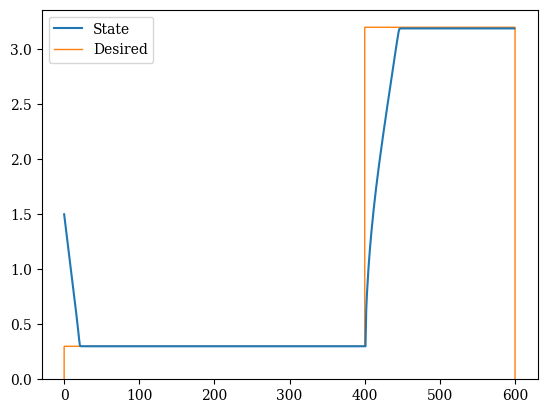

In [87]:
tank_env = init_wrappers(SphericalTank(desired_state=np.array([0.3, 2.8, 3.2]), max_episode_len=600, start_state = np.array([1.5])), observation_type='setpoint-error',randomise_setpoint=False)
tank_env = DelayAction(tank_env, delay = 0)

states, actions, rewards, avg, desired = test_agent(tank_agent, tank_env, deterministic=True, state_error=True)
start = 0
stop = 600
plt.plot((np.array(states))[start:stop])
# plt.axhline(tank_env.unwrapped.desired_state, color = 'r', linestyle = '--')
plt.stairs(np.array(tank_env.unwrapped.desired_trajectory)[start:stop])
plt.legend(['State', 'Desired'])
print(f"Bias: {states[-1] - tank_env.unwrapped.desired_state}")

## Train safe agent

In [88]:
core_env = SphericalTank(desired_state=np.array([2.6132]), max_episode_len=150, seed = 0)
safe_agent, env, delay_history, setpoint_history = train_default_augmented_sac(core_env = core_env, 
                                              agent_type='wcsac',
                                              desired_state=2.6132,
                                              seed = 0,
                                              observation_type='setpoint-error',
                                              randomise_setpoint=True, 
                                              random_delay=True,
                                              average_q=True,
                                              n_episodes=200, 
                                              ent_coef=0.5)
                                             # policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=dict(pi=[256, 256, 256], qf=[256, 256, 256])))



Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Replay buffer class <class 'buffer.ExtendedBuffer'>
Env state space (12,) and action space (1,)
Logging to logs/train/SphericalTank/setpoint-error/randomised/0613/Desired2.6132/wcsac


c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state_space_violation to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state_space_violation` for environment variables or `env.get_wrapper_attr('state_space_violation')` that will search the reminding wrappers.
  logger.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -581     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 12       |
|    time_elapsed    | 48       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 9.17     |
|    critic_loss     | 0.417    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -748     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 12       |
|    time_elapsed    | 99       |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 22.2     |
|    critic_loss     | 0.932    |
|    ent_coef        | 0.5      |
|    learning_

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.delay_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.delay_history` for environment variables or `env.get_wrapper_attr('delay_history')` that will search the reminding wrappers.
  logger.warn(
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.desired_states_history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desired_states_history` for environment variables or `env.get_wrapper_attr('desired_states_history')` that will search the reminding wrappers.
  logger.warn(


Delays chosen (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([15, 27, 15, 18, 12, 24, 14, 29, 17, 19, 16], dtype=int64)) times


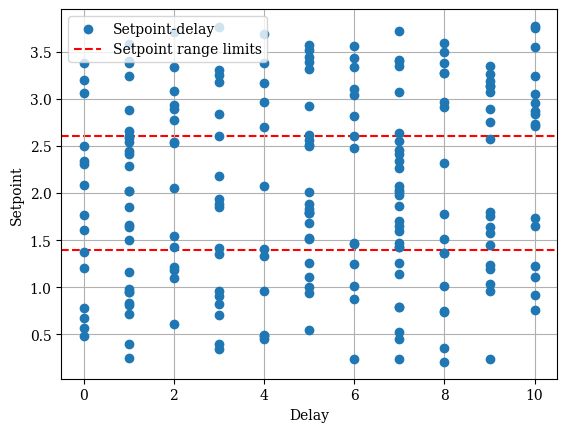

In [89]:
# len(env.desired_states_history)

print(f"Delays chosen {np.unique(delay_history, return_counts=True)} times")
plt.scatter(delay_history, setpoint_history,zorder=2)
plt.axhline(1.4, color='red', linestyle='--',zorder=1)
plt.axhline(2.6, color='red', linestyle='--',zorder=1)
plt.xlabel('Delay')
plt.ylabel('Setpoint')
plt.legend(['Setpoint-delay', 'Setpoint range limits'])
plt.grid(zorder=0)
plt.show()
# plt.set_axisbelow(True)

In [29]:
np.save('delay_history_2636.npy', delay_history)
np.save('setpoint_history_2636.npy', setpoint_history)

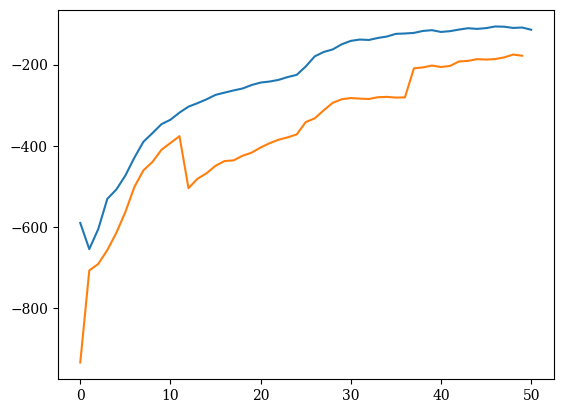

In [49]:
df = pd.read_csv('logs\\train\\SphericalTank\\setpoint-error\\randomised\\0524\\Desired3.0\\wcsac\\progress.csv')
plt.plot(df['rollout/ep_rew_mean'])
# df = pd.read_csv('logs\\train\\SphericalTank\\setpoint-error\\randomised\\0524\\Desired3.0\\wcsac\\progress.csv')
# plt.plot(df['rollout/ep_rew_mean'])
df = pd.read_csv('logs\\train\\SphericalTank\\setpoint-error\\randomised\\0605\\Desired2.638\\wcsac\\progress.csv')
plt.plot(df['rollout/ep_rew_mean'])


Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation


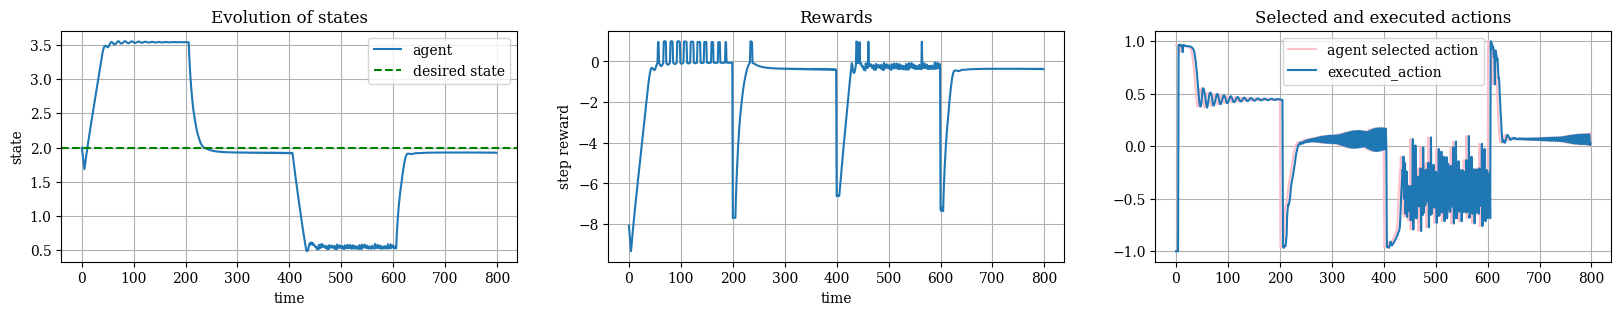

In [94]:
# safe_agent = SAC.load('models\\SphericalTank\\setpoint-error\\randomised\\Desired2.636\\wcsac.zip')
core_env = SphericalTank(desired_state=np.array([3.55, 2.0, 0.6]), start_state=np.array([2.0]), max_episode_len=800, seed = 58)
core_env = init_wrappers(core_env, observation_type='setpoint-error', randomise_setpoint=True)
env = DelayAction(core_env, delay = 5, random_delay=False, max_delay=global_config.MAX_DELAY)
env = AugmentState(env, known_delay=global_config.MAX_DELAY)

states, actions, rewards, avg_rewards, executed = test_augmented_agent(safe_agent, env, deterministic=True, state_error=True)
plot_test(env, states, rewards, actions, executed )

[0.61071603]


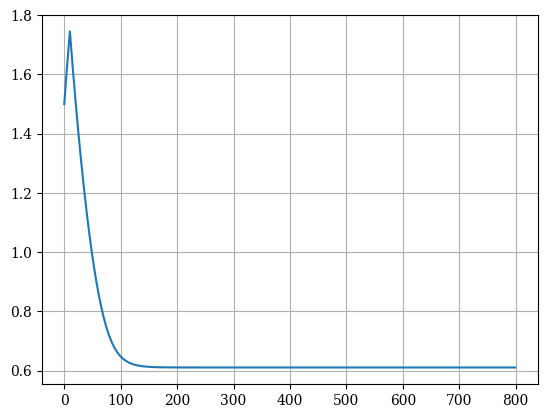

In [77]:
# play episode with core env
terminated = truncated = False
# env.unwrapped.start_state = np.array([2.0])
obs, info = env.reset()
states = []
actions = []
while not terminated and not truncated:
    states.append(env.unwrapped.state)
    action = np.array([-0.4])
    obs, reward, terminated, truncated, info = env.step(action)
    actions.append(action)
plt.plot(states)
# plt.plot(actions)
plt.grid()
print(states[-1])

In [22]:
training_phases = global_config.TANK_TRAINING_PHASES
n_eps_array = training_phases['n_episodes']
eps_length_array = training_phases['episode_length']
setpoint_regions_array = training_phases['setpoint_regions']

for n_eps, eps_length, setpoint_regions in zip(n_eps_array, eps_length_array, setpoint_regions_array):
            env.unwrapped.max_episode_len = eps_length  
            env.set_regions(setpoint_regions)
            print(env.max_episode_len)
            print(env.regions)
            # .learn(total_timesteps = n_eps * eps_length)

150
[Box(0.2, 1.4, (1,), float64), Box(1.4, 2.6, (1,), float64), Box(2.6, 3.8, (1,), float64)]
70
[Box(0.2, 0.8, (1,), float64), Box(0.8, 3.2, (1,), float64), Box(3.2, 3.8, (1,), float64)]


c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.regions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.regions` for environment variables or `env.get_wrapper_attr('regions')` that will search the reminding wrappers.
  logger.warn(


## Test against different delays

In [37]:
tank_agent = SAC.load('models\\SphericalTank\\setpoint-error\\randomised\\Desired3.0\\sac.zip')
safe_agent = SAC.load('models\\SphericalTank\\setpoint-error\\randomised\\Desired2.656\\wcsac.zip')

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


FileNotFoundError: [Errno 2] No such file or directory: 'models\\SphericalTank\\setpoint-error\\randomised\\Desired2.656\\wcsac.zip.zip'

Observation space Box(0.0, 4.0, (1,), float64)
Wrapping in observe setpoint error


c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.timestep to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.timestep` for environment variables or `env.get_wrapper_attr('timestep')` that will search the reminding wrappers.
  logger.warn(
c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.state_space_violation to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state_space_violation` for environment variables or `env.get_wrapper_attr('state_space_violation')` that will search the reminding wrappers.
  logger.warn(


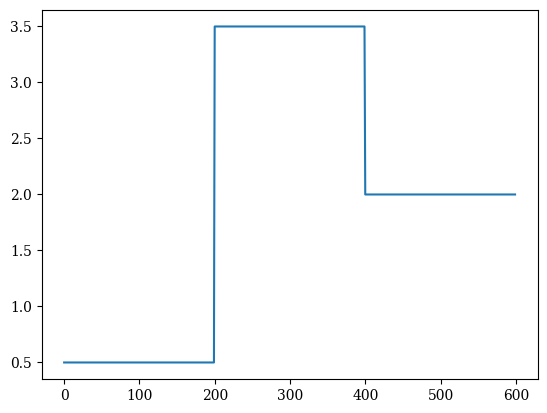

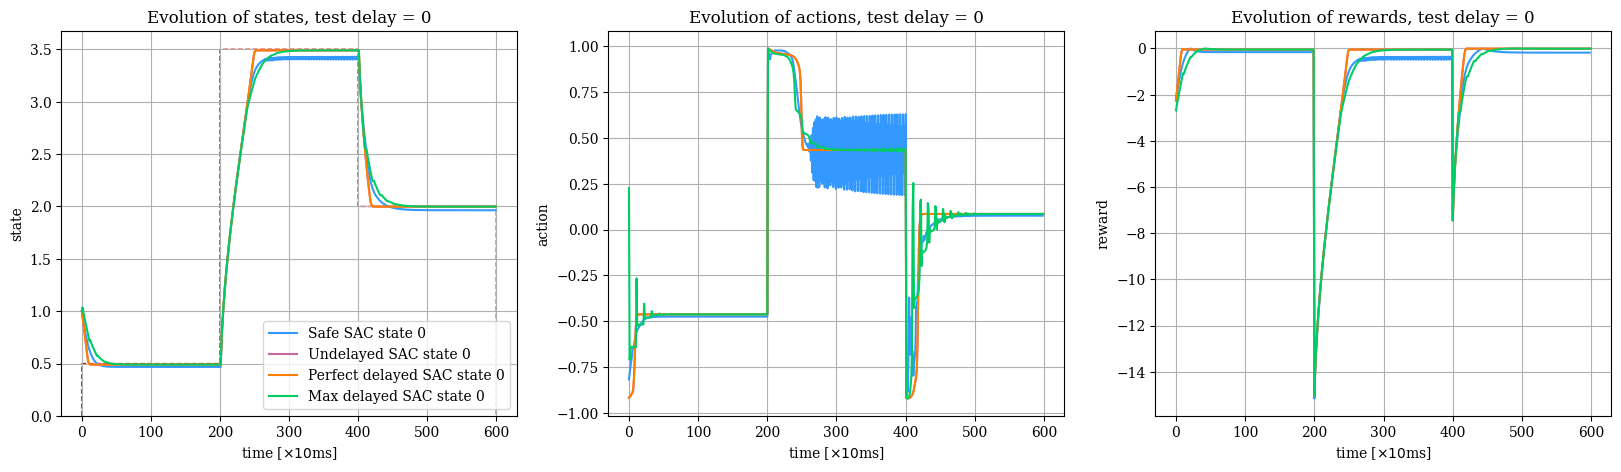

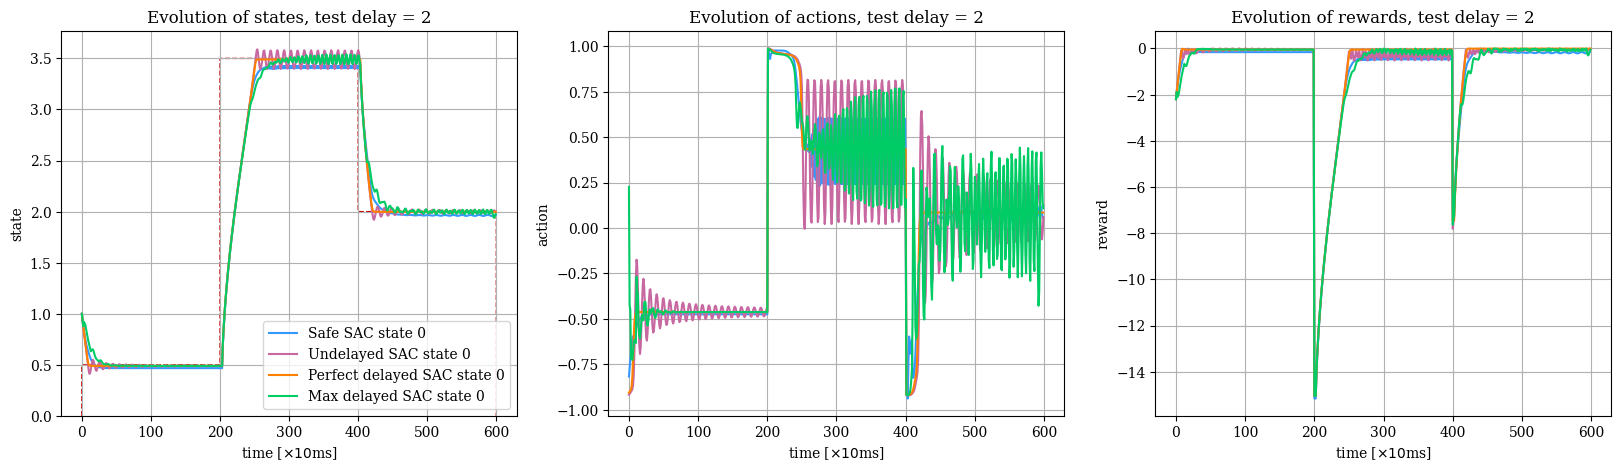

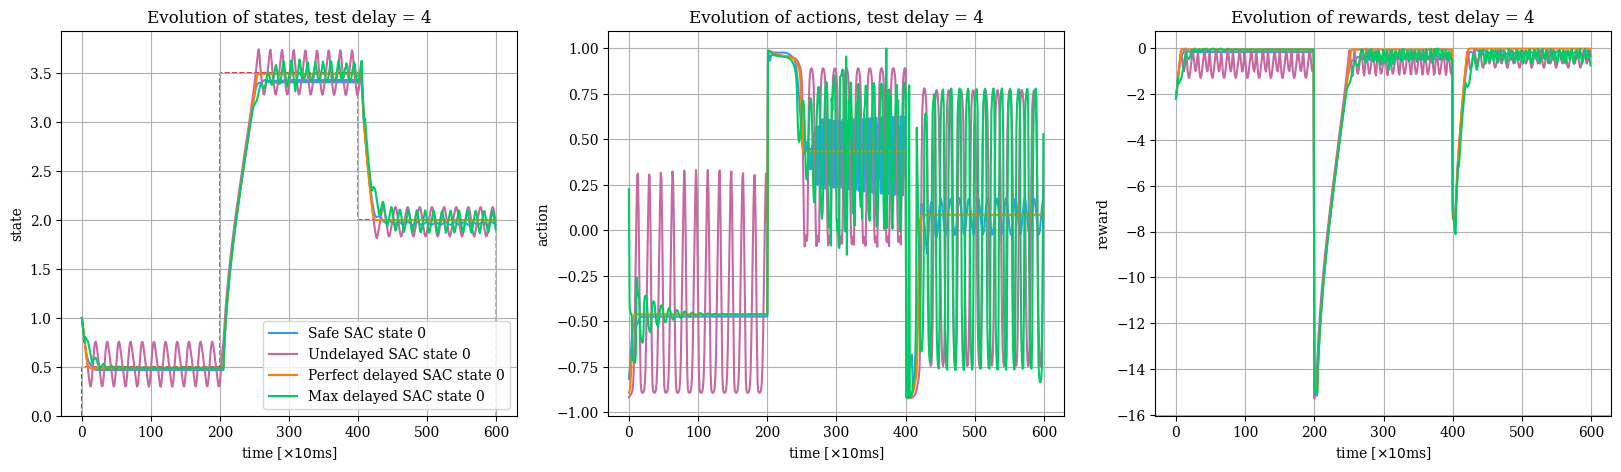

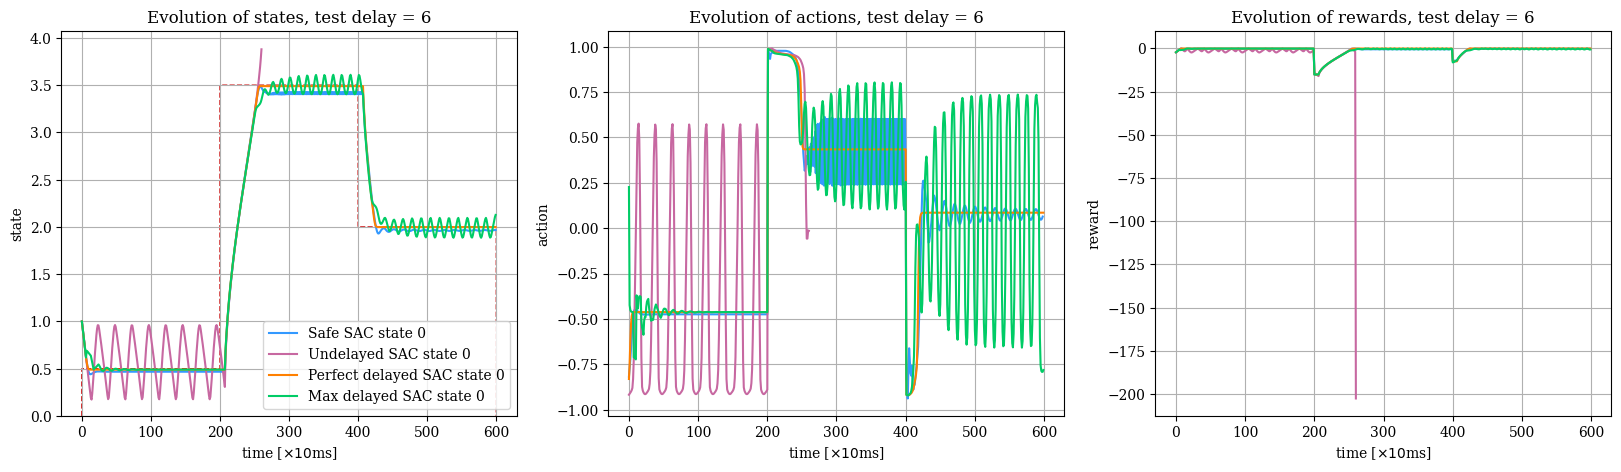

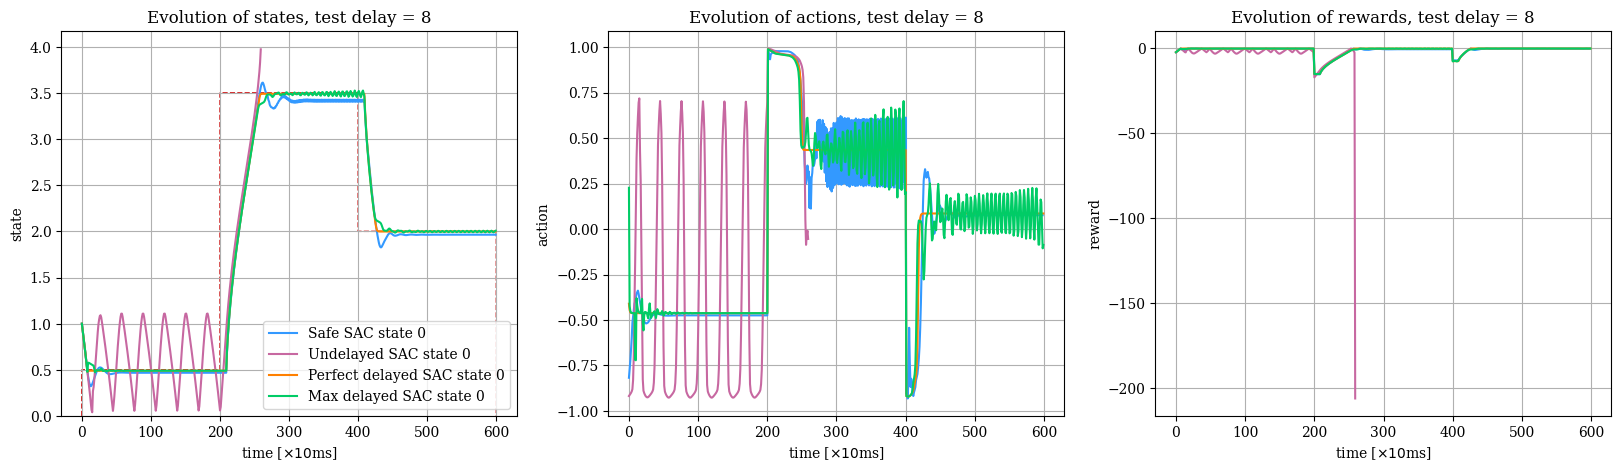

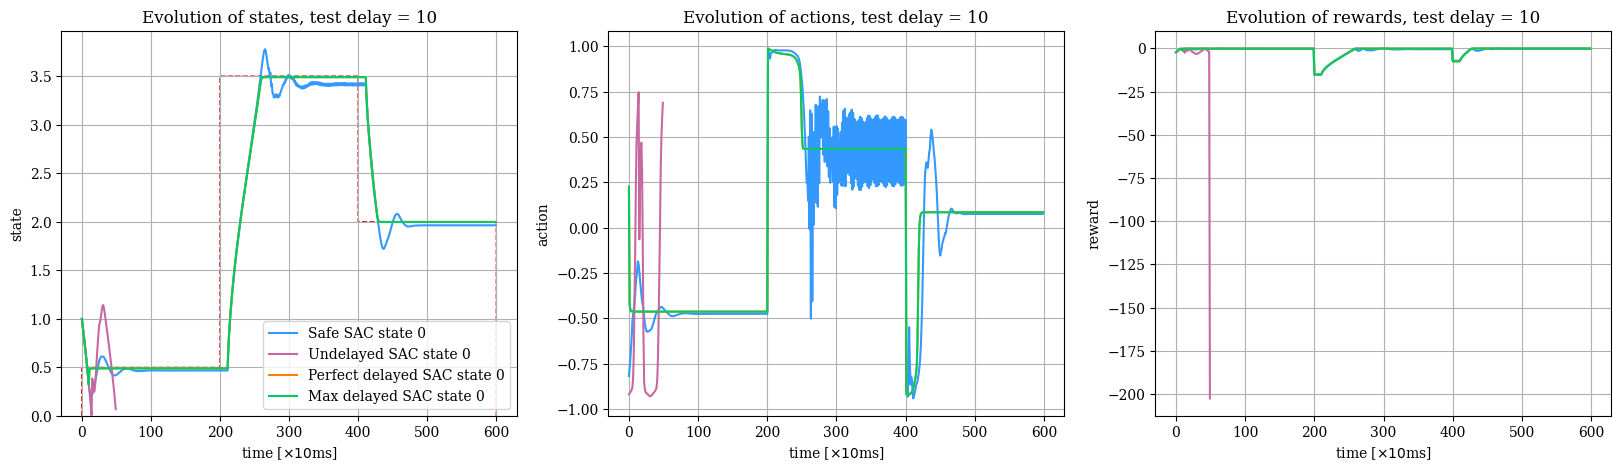

In [8]:
core_env = SphericalTank(desired_state=np.array([0.5, 3.5, 2.0]), start_state=np.array([1.0]), max_episode_len=600, seed = 58)
core_env = init_wrappers(core_env, observation_type='setpoint-error', randomise_setpoint=False)
plt.plot(core_env.unwrapped.desired_trajectory)

results = test_different_delayed_agents(tank_agent,core_env, deterministic=True, augmented_agent=safe_agent )

### Q-values analysis

In [ ]:
safe_critic = safe_agent.critic

obs = np.array([3.8, 0.3])
action = np.array([0.1])

env_model = copy.deepcopy(core_env)

next_delayed_state = predict_next_state(env_model=env_model, cur_state=safe_critic, action = action)
next_action = safe_agent.policy(torch.tensor(next_delayed_state)).detach().numpy()

q_value = safe_critic(torch.tensor(next_delayed_state), next_action).float().unsqueeze(0).detach().numpy()     


